In [ ]:
# Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas_profiling
import requests # might need to be installed
%matplotlib inline

In [ ]:
train = pd.read_csv(r'train1.csv')
test = pd.read_csv(r'test.csv')

In [ ]:
# getting a data dictionary
# response = requests.get('https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/205873/data_description.txt?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1564407075&Signature=Iduf4UDvx2Cei5S9B7A%2B%2Fz3u%2Ff8GG0RxvpfMu5IHRtJOFBsjq806B2sSr6zucZBwJeBNSOuIpOssfa4i%2BYS8ybrJgaHnA%2Fqkcox6ZsD8BLIl3yTHjwmfkie2ohGSI0bdZLiXblBWps8xJ8sGZPnmTegLYLhFgrA7O0BEF5dIXrFVYufTcndkOeOyYm3fopGjTablaxWOUyhmd43WfOxADJInaMqUk37SBzVD4jD1bj%2F%2B%2FJkK7OeTvUIBJOR3EXij97rhVqcZNdxTttF91t0W3HFcqJrRhrw5%2BKvZmHNzsT5AO164QSjlFqT5kU3dZWoZqxdDOxImVvr%2Fw2m4IRZGCw%3D%3D')
# dict = response.text


In [ ]:
# print(dict)

In [ ]:
# train.describe().T
# test.describe().T

In [ ]:
sns.distplot(train['SalePrice'])
plt.axvline(train['SalePrice'].mean(), color="k", linestyle="--")

In [ ]:
# pandas_profiling.ProfileReport(train)

### Dealing with missing values in obvious features

In [3]:
# Type of alley access to property
# print(train['Alley']).column_name()
# for c in train.columns:
#     print(train[c].value_counts())
#     print("Number of NaNs in the column {} is {}".format(c, train[c].isna().sum()))

train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
train['Alley'].fillna('NA', inplace = True)
train['FireplaceQu'].fillna('NA', inplace = True)
train['GarageQual'].fillna('NA', inplace = True)
train['GarageFinish'].fillna('NA', inplace = True)
train['GarageCond'].fillna('NA', inplace = True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
train['GarageType'].fillna('NA', inplace = True)
train['PoolQC'].fillna('NA', inplace = True)
train['Fence'].fillna('NA', inplace = True)
train['MiscFeature'].fillna('NA', inplace = True)
train['MasVnrType'].fillna('None', inplace = True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace = True)
train['BsmtQual'].fillna('NA', inplace = True)
train['BsmtCond'].fillna('NA', inplace = True)
train['BsmtExposure'].fillna('NA', inplace = True)
train['BsmtFinType1'].fillna('NA', inplace = True)
train['BsmtFinType2'].fillna('NA', inplace = True)
train['Electrical'].fillna('SBrkr', inplace = True) # substituting with the majority class

# and for the test set

test['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
test['Alley'].fillna('NA', inplace = True)
test['FireplaceQu'].fillna('NA', inplace = True)
test['GarageQual'].fillna('NA', inplace = True)
test['GarageFinish'].fillna('NA', inplace = True)
test['GarageCond'].fillna('NA', inplace = True)
test['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
test['GarageType'].fillna('NA', inplace = True)
test['PoolQC'].fillna('NA', inplace = True)
test['Fence'].fillna('NA', inplace = True)
test['MiscFeature'].fillna('NA', inplace = True)
test['MasVnrType'].fillna('None', inplace = True)
test['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace = True)
test['BsmtQual'].fillna('NA', inplace = True)
test['BsmtCond'].fillna('NA', inplace = True)
test['BsmtExposure'].fillna('NA', inplace = True)
test['BsmtFinType1'].fillna('NA', inplace = True)
test['BsmtFinType2'].fillna('NA', inplace = True)
test['Electrical'].fillna('SBrkr', inplace = True) # substituting with the majority class

In [16]:
# Let's look a column name, and a number of NaNs
# train.isna().sum()
#or 
train.columns[train.isna().any()].tolist()

[]

### Feature engineering part

#### Categorical are categorical; numeric are numeric

In [29]:
train['Id'] = train['Id'].astype('category') 
train['MSSubClass'] = train['MSSubClass'].astype('category')
# train['YearBuilt'] = train['YearBuilt'].astype('category')
# train['YrSold'] = train['YrSold'].astype('category')
# train['YearRemodAdd'] = train['YearRemodAdd'].astype('category')
train['MoSold'] = train['MoSold'].astype('category')
train['GarageYrBlt'] = train['GarageYrBlt'].astype('category')
train['Fence'] = train['Fence'].astype('category')
train['MiscFeature'] = train['MiscFeature'].astype('category')
train['MiscVal'] = train['MiscVal'].astype('category')

In [ ]:
[col for col in train.columns.tolist() if train[col].dtype not in ['object']] 

#### Need to check cardinality in train and test sets and look at the outlies in columns to which it applies

In [ ]:
for col in train.columns:
    if train[col].dtype == "object":
        print("For column {} cardinality in Train minus cardinality in Test equals: {}".format(col, train[col].nunique()-test[col].nunique()))
# cardinality of train is always higher than that of test        

#### Exploring columns where cardinality in train and test sets isn't the same

In [6]:
# combining into one dataset in order to more conveniently compare unique values in these columns:
train_1 = train.copy()
train_1.drop(labels = 'SalePrice', axis = 1, inplace = True)
train_1['Status'] = 'Train Set' # adding a column Status to differentiate between Train and Test in the combined set
test_1 = test.copy()
test_1['Status'] = 'Test Set'
combo = train_1.copy()
combo = combo.append(test_1)

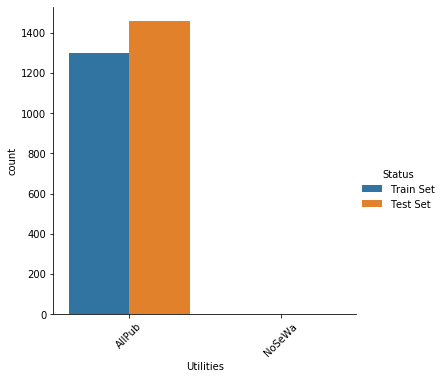

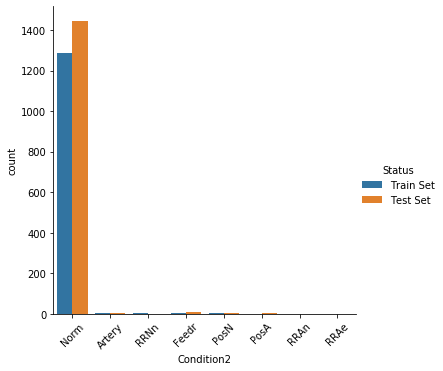

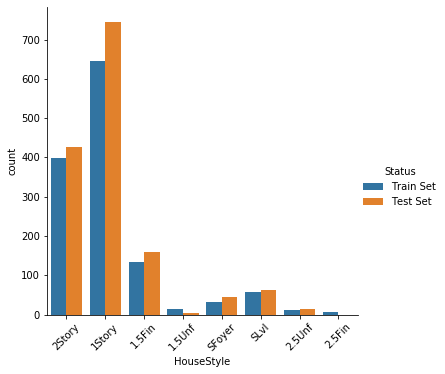

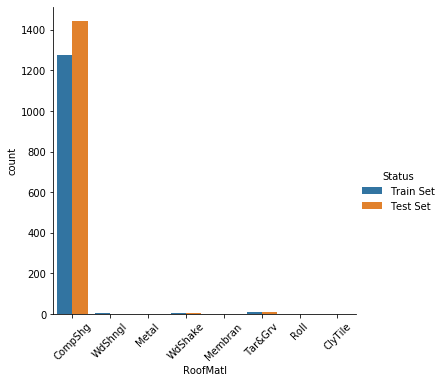

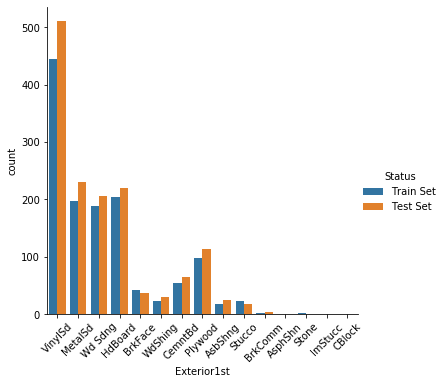

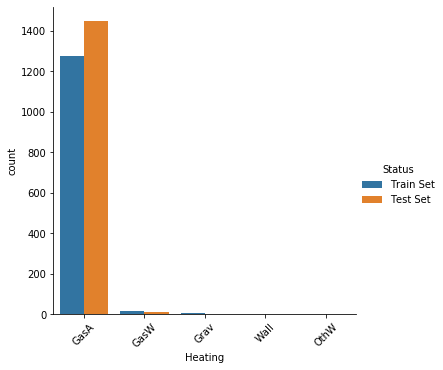

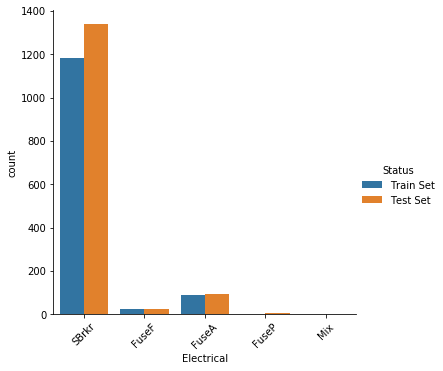

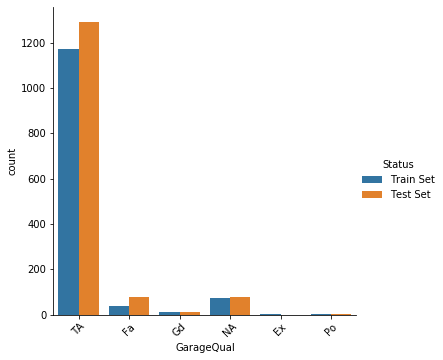

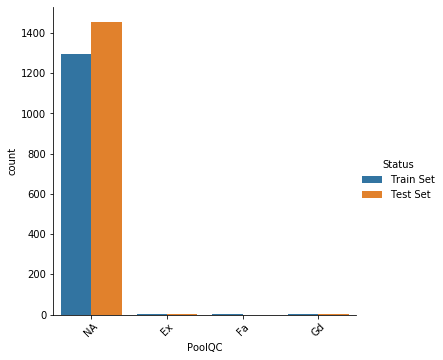

In [14]:
# Gathering columns for which cardinality isn't the same into a list in order to make charts
cols_list = []
for col in train.columns:
     if train[col].dtype == "object" and (train[col].nunique()-test[col].nunique()) != 0:
        cols_list.append(col)
        
# cols_list1 = [cols_list1.append(train.col) for col in train.columns 
#               if (train[col].nunique()-test[col].nunique()) != 0]

# looking at values in these columns
for l in cols_list:
    sns.catplot(x=l, hue='Status', kind='count', data=combo)
    plt.xticks(rotation=45)

In [ ]:
# Scatterplots: numeric columns vs. SalePrice in the train set 
# numeric columns
# digit_cols = list(train.select_dtypes(include=[np.number]).columns.values)
digit_cols = train.select_dtypes(include=['float64','int64']).columns.to_list()
# digit_cols = digit_cols[2:] # don't need the first two columns
# scatter plots: digit_cols vs. SalePrice

for cols in digit_cols:
    plt.figure()
    sns.scatterplot(x = cols, y = 'SalePrice', data = train)
    
# LotFrontage, LotArea, YearBuilt, TotalBsmtSF, GrLivArea, 1stFlrSF, 2ndFlrSF, GarageArea seem to have linear relationships

In [55]:
#unloading charts from the memory because there are too many
plt.clf()
plt.close()

In [43]:
# turning object columns into category columns
for i in train.select_dtypes(include='object').columns.to_list():
    train[i] = train[i].astype('category')

In [45]:
# list w/ categorical variables
cater_cols = train.select_dtypes(include='category').columns.to_list()

In [ ]:
# categorical variables vs. SalePrice TAKES TIME
for cols in cater_cols:
    plt.figure()
    sns.boxplot(x = cols, y = 'SalePrice', data = train)

In [ ]:
# Going back to columns with different cardinality cols_list
for cols in cols_list:
    plt.figure()
    sns.boxplot(x = cols, y = 'SalePrice', data = train)

In [47]:
#unloading charts from the memory because there are too many
plt.clf()
plt.close()

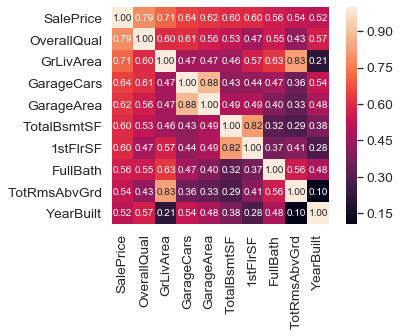

In [56]:
corrmat = train.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# OverallQual, GrLivArea: Above grade (ground) living area square feet -- the strongest
#GarageCars and GarageArea is probably the same. Keeping only GarageCars because it's stronger
#TotalBsmtSF and 1stFlrSF are similar, keeping only TotalBsmntSF

In [ ]:
# Looking at these variables again
sns.distplot(train['GrLivArea'])
plt.axvline(train['GrLivArea'].mean(), color="k", linestyle="--")
plt.figure()
sns.distplot(train['TotalBsmtSF'])
plt.axvline(train['TotalBsmtSF'].mean(), color="k", linestyle="--")

#will need log transformation probably or some other normalization

In [ ]:
plt.clf()
plt.close()

In [ ]:
# Engineering around the house age
#YearBuilt: Original construction date
#YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
# Will add a new column: Remodeled Y/N. If YearRemodAdd = YearBuilt, then no, otherwise yes 
# Will add a new column: Age when sold. YrSold - YearRemodAdd 
combo['Remodeled Y/N'] = np.where(combo['YearRemodAdd'] ==combo['YearBuilt'], 'No', 'Yes')
combo['Age when Sold'] = combo['YrSold'] - combo['YearRemodAdd']

In [57]:
#and for the train set
train['Remodeled Y/N'] = np.where(train['YearRemodAdd'] ==train['YearBuilt'], 'No', 'Yes')
train['Age when Sold'] = train['YrSold'] - train['YearRemodAdd']

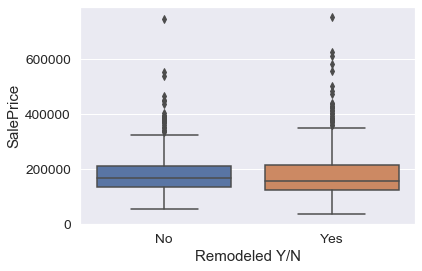

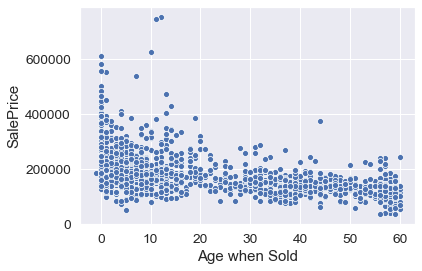

In [58]:
sns.boxplot(x ='Remodeled Y/N' , y = 'SalePrice', data = train)
plt.figure()
sns.scatterplot(x = 'Age when Sold', y = 'SalePrice', data = train)
# nothing crazy

In [ ]:
#adding a new column totSqFt
#TotalBsmtSF + GrLivArea
train['totSqFt'] = train['TotalBsmtSF'] + train['GrLivArea']
# combo['totSqFt'] = combo['TotalBsmtSF'] + combo['GrLivArea']

In [ ]:
sns.scatterplot(x = 'totSqFt', y = 'SalePrice', data = train)
# a bit better than when they're one by one as below

In [ ]:
# one by one
sns.scatterplot(x = 'TotalBsmtSF', y = 'SalePrice', data = train)
plt.figure()
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = train)

In [ ]:
# Building normality plots
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [ ]:
qqplot(train['SalePrice'], line='s')
pyplot.show()
# might be good to remove houses > 600K. Maybe do it later

In [ ]:
qqplot(train['totSqFt'], line='s')
pyplot.show()

In [ ]:
# Remove correlated variables
# Remove houses that are very cheap and very expensive

In [ ]:
# checking outliers
# train[train['totSqFt']>10000]
# train[train['SalePrice']>700000]
# Seems that removing a house with totSqFt > 10000 is a good idea
train.drop(train[train.totSqFt>10000].index, inplace = True)

In [ ]:
# correlated variables to remove: GarageArea, 1stFlrSF, totRmsAbvGrd
train_clean = train.copy()
train_clean.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd'], axis = 1, inplace = True) 
# now it's a new train dataset without the correlated features

In [ ]:
# train['SalePrice'].describe()
plt.hist(train['SalePrice'],bins = 20, log=True) 
plt.figure()
plt.hist(train['SalePrice'], bins = 15) 

### Encoding categorical features using dummy variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
features = train.drop(['Id','SalePrice'], axis = 1)
result = train['SalePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, result, test_size = 0.2, random_state = 12)

In [ ]:
le = LabelEncoder()
ohe = OneHotEncoder(handle_unknown='ignore')

In [ ]:
ohe.fit(X_train.select_dtypes(include=['object']))  

In [ ]:
X_train_ohe = ohe.transform(X_train.select_dtypes(include=['object']))
X_test_ohe = ohe.transform(X_test.select_dtypes(include=['object']))

# Machine Learning part

### Base case with a random forest

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_ohe, y_train)

In [ ]:
#Making prediction on unseen data
predictions_rf = rf.predict(X_test_ohe)

In [ ]:
accuracy_score(y_test, predictions_rf)

### Regression and lasso

In [ ]:
# Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train_ohe, y_train)

In [ ]:
predictions_lr = lr.predict(X_test_ohe)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [ ]:
print("Explained variance is {}\nR-squared is {}".format(explained_variance_score(y_test, predictions_lr),
     r2_score(y_test, predictions_lr)))


In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(y_test, predictions_lr)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print("For the test set, the mean squared error is {}, and R2 is {:.2%}".format(np.sqrt(mean_squared_error(y_test,predictions_lr)),
                                                                           r2_score(y_test, predictions_lr)))
print("For the train set, the mean squared error is {}, and R2 is {:.2%}".format(np.sqrt(mean_squared_error(y_train,pred_test_lr)),
                                                                            r2_score(y_train, pred_test_lr)))


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train_ohe, y_train)

In [ ]:
pred_train_lasso= model_lasso.predict(X_train_ohe)
pred_test_lasso= model_lasso.predict(X_test_ohe)
print("After lasso, for the test set, the mean squared error is {:2}, and R2 is {:.2%}".format(
     np.sqrt(mean_squared_error(y_test,pred_test_lasso)), r2_score(y_test, pred_test_lasso)))
print("After lasso, for the train set, the mean squared error is {:2}, and R2 is {:.2%}".format(
     np.sqrt(mean_squared_error(y_train,pred_train_lasso)), r2_score(y_train, pred_train_lasso)))

In [ ]:
# GridSearch for lasso parameters

In [ ]:
# cross-validation
# lasso and another cross-validation. GridSearch for lasso and another cross-validation

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
sc = cross_validate(lr, X_train_ohe, y_train, scoring='r2', cv=3, return_train_score = True)   
print("R2 Scores are {}\nIts mean is {}".format(sc['test_score'],sc['test_score'].mean()))

In [ ]:
sc = cross_validate(lr, X_train_ohe, y_train, scoring='explained_variance', cv=3, return_train_score = True)   
print(sc['test_score'].mean())

In [ ]:
sc = cross_validate(lr, X_train_ohe, y_train, scoring='max_error', cv=3, return_train_score = True)   
print(sc['test_score'].mean())